# Applying fuzzy clustering to new dataset

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import skfuzzy as fuzz

## import ExtractRulesQPSO class
import sys, os
sys.path.append(os.getcwd() + '/scripts')

from importlib import reload
import ExtractRulesQPSO
reload(ExtractRulesQPSO)

import FuzzyClustering
reload(FuzzyClustering)

from ExtractRulesQPSO import ExtractRulesQPSO
from FuzzyClustering import FuzzyClustering
from FuzzyRule import FuzzyRule

In [2]:
df = pd.read_csv('./data/data_extraction.csv', header=1)
df.head()

,x,y,x.1,y.1,x.2,y.2
0,-1.513584,2.021725,-1.407596,-0.688274,2.236173,2.033473
1,-1.231298,2.011772,-1.159470,-0.651288,2.387670,1.929299
2,-1.247023,1.969969,-1.025865,-0.692831,2.306333,1.850828
3,-0.716827,2.007446,-1.539035,-0.751166,2.024913,1.819007
4,-0.831566,1.939361,-1.504118,-0.834656,2.194410,1.646978


In [3]:
df = df.dropna()

## Training and testing split

In [4]:
TEST_SIZE = 0.2

In [5]:
df_train, df_test = train_test_split(df, test_size=TEST_SIZE)

In [6]:
df_train.shape, df_test.shape

((477, 6), (120, 6))

In [7]:
df_train.head()

,x,y,x.1,y.1,x.2,y.2
62,1.669765,1.193029,-0.511908,-0.821213,12.659768,-0.522795
169,6.938953,-0.312544,5.241498,-1.895836,4.847374,1.701522
248,-0.074864,1.009769,12.654883,-1.105885,5.700242,0.619138
342,3.016079,-0.163735,7.719883,-0.847520,3.749660,1.025982
264,2.708183,0.429757,7.137243,-0.682069,14.792076,0.671517


## Processing the data into three classes

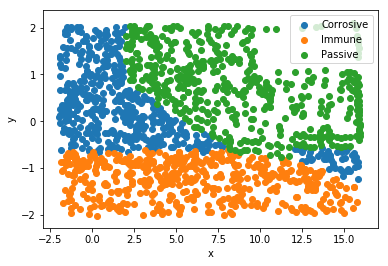

In [8]:
data_corrosive = []
for idx in range(df_train.shape[0]):
    tmp = np.array([df_train['x'].values[idx], df_train['y'].values[idx]])
    data_corrosive.append(tmp)

data_corrosive = np.array(data_corrosive)


data_immune = []
for idx in range(df_train.shape[0]):
    tmp = np.array([df_train['x.1'].values[idx], df_train['y.1'].values[idx]])
    data_immune.append(tmp)

data_immune = np.array(data_immune)

data_passive = []
for idx in range(df_train.shape[0]):
    tmp = np.array([df_train['x.2'].values[idx], df_train['y.2'].values[idx]])
    data_passive.append(tmp)

data_passive = np.array(data_passive)


plt.scatter(data_corrosive[:,0], data_corrosive[:,1], label = 'Corrosive')
plt.scatter(data_immune[:,0], data_immune[:,1], label = 'Immune')
plt.scatter(data_passive[:,0], data_passive[:,1], label = 'Passive')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## Applying the fuzzy clustering

In [10]:
fc_corrosive = FuzzyClustering(data_corrosive)
fc_immune = FuzzyClustering(data_immune)
fc_passive = FuzzyClustering(data_passive)

In [11]:
## finding centers
fc_corrosive.extractClusteringCenters()
centers_corrosive = fc_corrosive.getDenormalizedClusterCenters()

fc_immune.extractClusteringCenters()
centers_immune = fc_immune.getDenormalizedClusterCenters()

fc_passive.extractClusteringCenters()
centers_passive = fc_passive.getDenormalizedClusterCenters()

In [12]:
centers_corrosive, centers_immune, centers_passive

(array([[ 1.32324787,  0.18815782],
        [-0.16031478,  1.59472809],
        [13.90994267, -0.81649387]]), array([[ 6.21108217, -1.03341728],
        [12.66105641, -1.40352414],
        [ 2.05767323, -1.58372782],
        [-0.65780106, -0.83840465],
        [ 8.53086572, -1.93838007]]), array([[ 5.8713815 ,  1.05926162],
        [12.10603478,  0.25172515],
        [ 6.46335898, -0.17326773],
        [15.8229878 ,  1.36782823]]))

In [13]:
centers_corrosive_df = pd.DataFrame(centers_corrosive)
num_rules_corrosive = len(centers_corrosive)
centers_corrosive_df.columns = ['x' + str(i + 1) for i in range(len(centers_corrosive[0]))]
centers_corrosive_df['class_label'] = 'Corrosive'

centers_immune_df = pd.DataFrame(centers_immune)
num_rules_immune = len(centers_immune)
centers_immune_df.columns = ['x' + str(i + 1) for i in range(len(centers_immune[0]))]
centers_immune_df['class_label'] = 'Immune'

centers_passive_df = pd.DataFrame(centers_passive)
num_rules_passive = len(centers_passive)
centers_passive_df.columns = ['x' + str(i + 1) for i in range(len(centers_passive[0]))]
centers_passive_df['class_label'] = 'Passive'

In [14]:
all_class_centers = []
all_class_centers.append(centers_corrosive)
all_class_centers.append(centers_immune)
all_class_centers.append(centers_passive)

all_class_centers

[array([[ 1.32324787,  0.18815782],
        [-0.16031478,  1.59472809],
        [13.90994267, -0.81649387]]), array([[ 6.21108217, -1.03341728],
        [12.66105641, -1.40352414],
        [ 2.05767323, -1.58372782],
        [-0.65780106, -0.83840465],
        [ 8.53086572, -1.93838007]]), array([[ 5.8713815 ,  1.05926162],
        [12.10603478,  0.25172515],
        [ 6.46335898, -0.17326773],
        [15.8229878 ,  1.36782823]])]

## Plotting clustering results

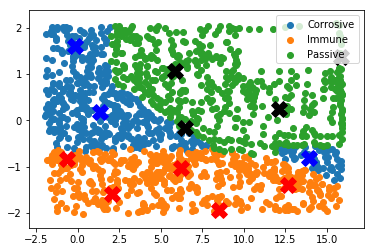

In [15]:
plt.scatter(data_corrosive[:,0], data_corrosive[:,1], label = 'Corrosive')
plt.scatter(data_immune[:,0], data_immune[:,1], label = 'Immune')
plt.scatter(data_passive[:,0], data_passive[:,1], label = 'Passive')

## Add centers of Corrosive
for cs in centers_corrosive:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'blue', s = 250)

## Add centers of Immune
for cs in centers_immune:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'red', s = 250)
    
## Add centers of Passive
for cs in centers_passive:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'black', s = 250)

plt.legend();

## QPSO

In [16]:
qpso = ExtractRulesQPSO(20, 50, 2 * (len(centers_corrosive) + len(centers_immune) + len(centers_passive)))

In [17]:
qpso.solver([centers_corrosive, centers_immune, centers_passive], 
            [data_corrosive, data_immune, data_passive])

In [18]:
qpso.best_particle

array([ 1.58053258,  1.95247231,  2.26252651,  2.87148763,  1.86083474,
       -0.14765669,  1.25330307,  0.42573595,  2.60695601,  0.56702642,
        2.22683406, -0.48954798,  2.69211375,  0.14881606,  2.8693914 ,
       -0.73994023,  1.55807566,  0.74737733,  2.80312191,  0.54900837,
        0.0331097 ,  1.88866105,  0.92771396,  2.98554234])

In [19]:
tuned_stds = ExtractRulesQPSO._arrangeStds(qpso.best_particle, all_class_centers)
stds_corrosive, stds_immune, stds_passive = tuned_stds
tuned_stds

[array([[ 1.58053258,  1.95247231],
        [ 2.26252651,  2.87148763],
        [ 1.86083474, -0.14765669]]), array([[ 1.25330307,  0.42573595],
        [ 2.60695601,  0.56702642],
        [ 2.22683406, -0.48954798],
        [ 2.69211375,  0.14881606],
        [ 2.8693914 , -0.73994023]]), array([[1.55807566, 0.74737733],
        [2.80312191, 0.54900837],
        [0.0331097 , 1.88866105],
        [0.92771396, 2.98554234]])]

In [20]:
stds_passive

array([[1.55807566, 0.74737733],
       [2.80312191, 0.54900837],
       [0.0331097 , 1.88866105],
       [0.92771396, 2.98554234]])

## Showing rules

/Users/Minshen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

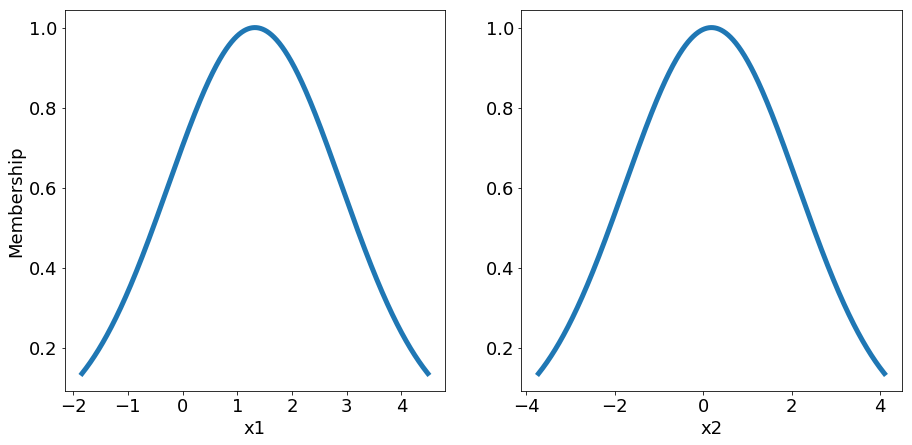

<Figure size 432x288 with 0 Axes>

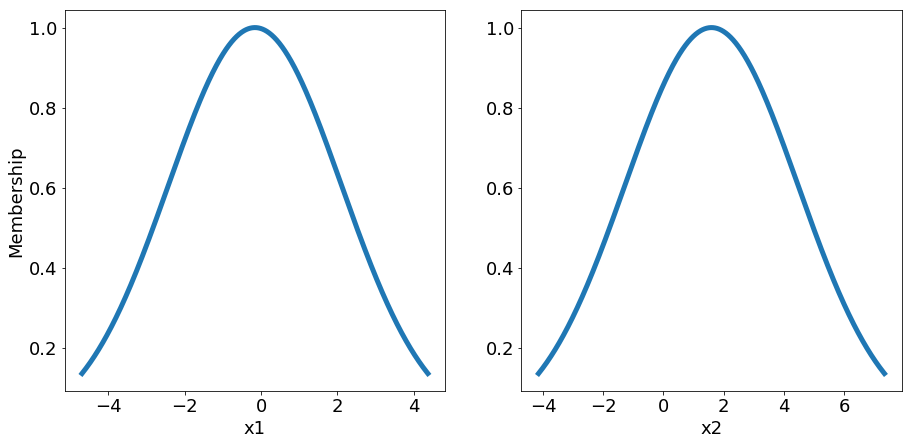

<Figure size 432x288 with 0 Axes>

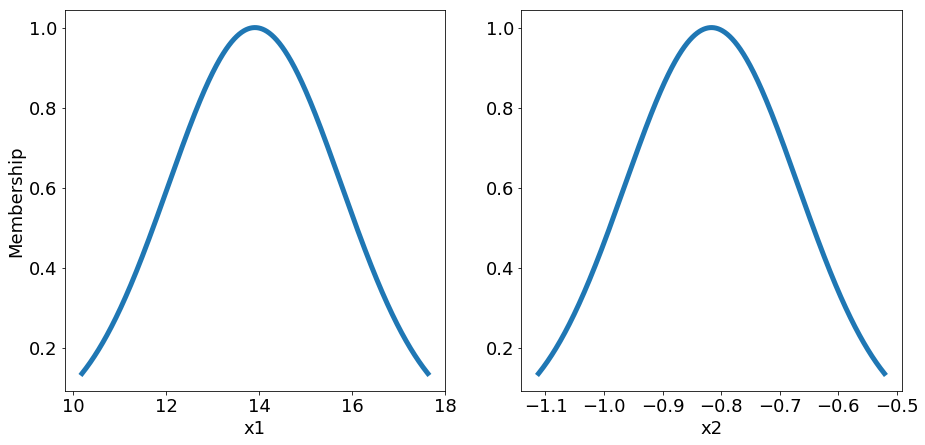

<Figure size 432x288 with 0 Axes>

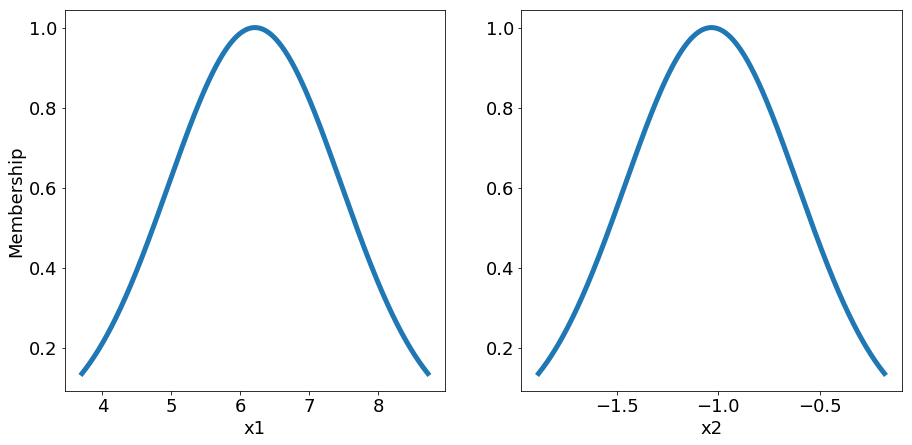

<Figure size 432x288 with 0 Axes>

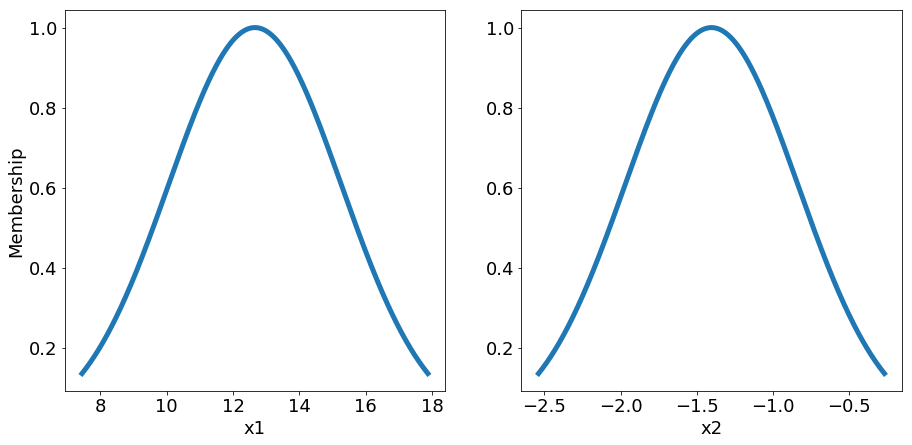

<Figure size 432x288 with 0 Axes>

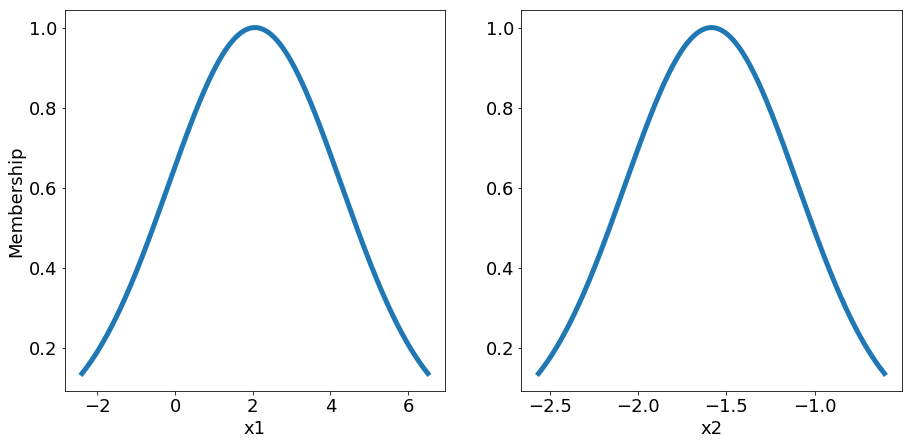

<Figure size 432x288 with 0 Axes>

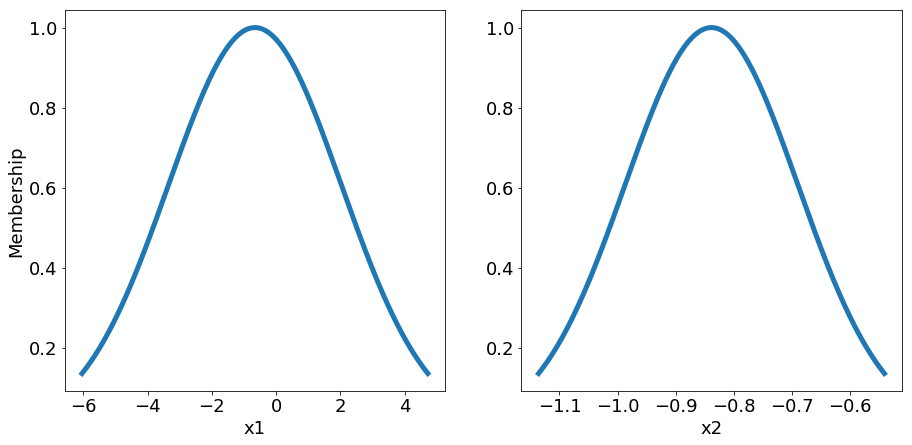

<Figure size 432x288 with 0 Axes>

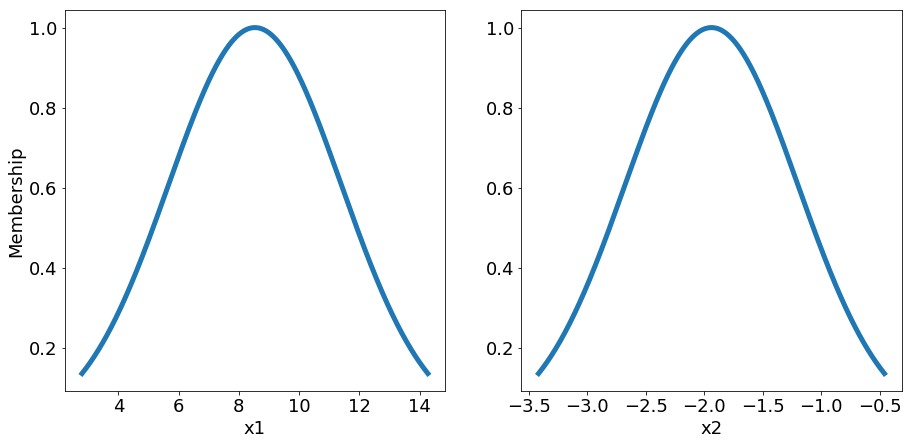

<Figure size 432x288 with 0 Axes>

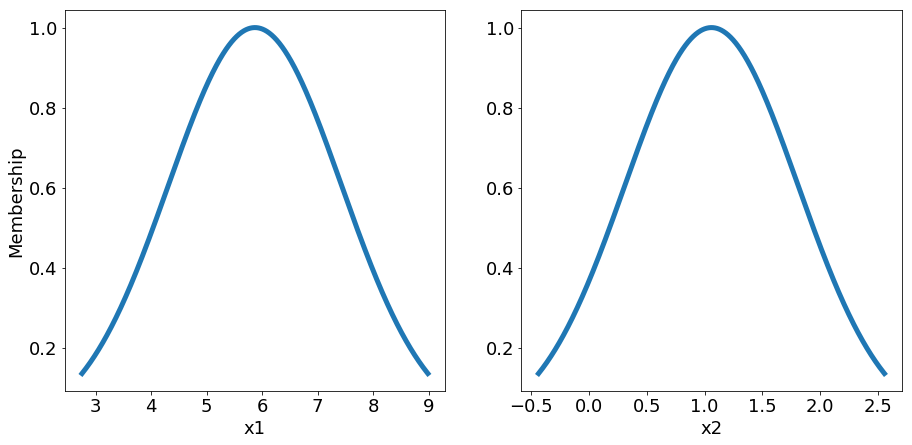

<Figure size 432x288 with 0 Axes>

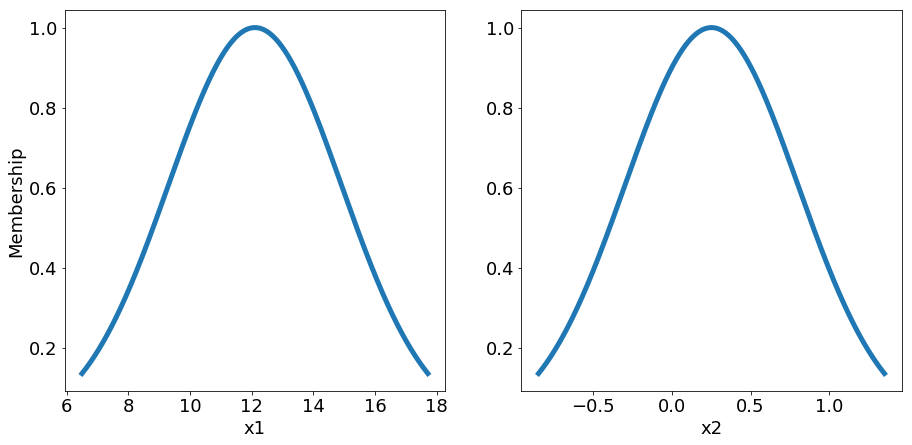

<Figure size 432x288 with 0 Axes>

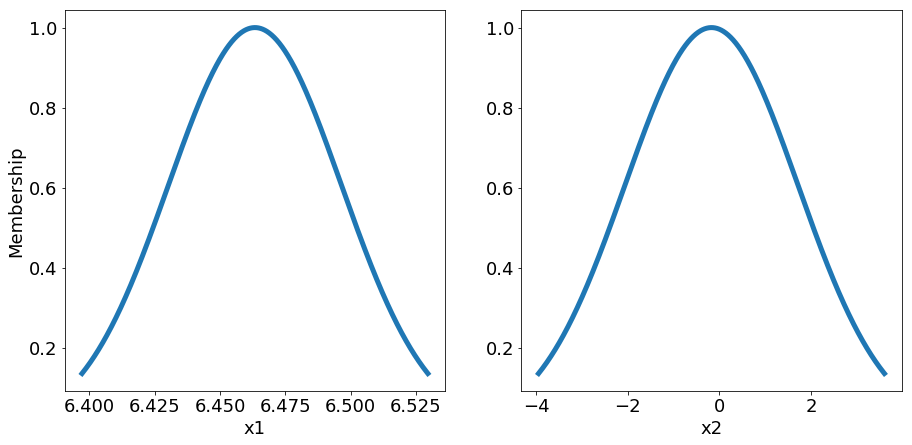

<Figure size 432x288 with 0 Axes>

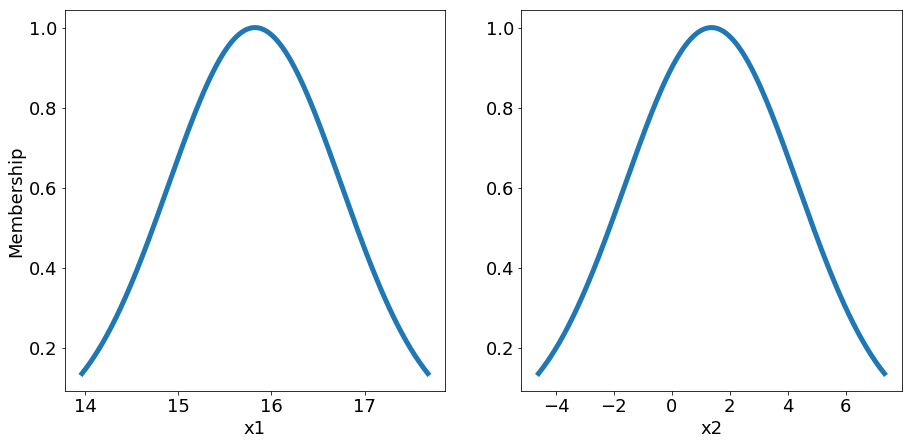

In [21]:
class_labels = ['Corrosive', 'Immune', 'Passive']

for all_centers, all_stds, class_label in zip(all_class_centers, tuned_stds, class_labels):
    # iterate through all classes
    
    for centers, stds in zip(all_centers, all_stds):
        # iterate through all rules
        rule = FuzzyRule(centers, stds, class_label)
        rule.plotRule()

## Testing results

In [24]:
xs = []
ys = []
testing_labels = []

test_data_corrosive = []
for idx in range(df_test.shape[0]):
    tmp = np.array([df_test['x'].values[idx], df_test['y'].values[idx]])
    test_data_corrosive.append(tmp)

test_data_corrosive = np.array(test_data_corrosive)

test_data_immune = []
for idx in range(df_test.shape[0]):
    tmp = np.array([df_test['x.1'].values[idx], df_test['y.1'].values[idx]])
    test_data_immune.append(tmp)

test_data_immune = np.array(test_data_immune)

test_data_passive = []
for idx in range(df_test.shape[0]):
    tmp = np.array([df_test['x.2'].values[idx], df_test['y.2'].values[idx]])
    test_data_passive.append(tmp)

test_data_passive = np.array(test_data_passive)

In [25]:
for data_point in test_data_corrosive:
    xs.append(data_point[0])
    ys.append(data_point[1])
    testing_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )

    
for data_point in test_data_immune:
    xs.append(data_point[0])
    ys.append(data_point[1])
    testing_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )
    
for data_point in test_data_passive:
    xs.append(data_point[0])
    ys.append(data_point[1])
    testing_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )

NameError: name 'all_class_centers' is not defined

In [24]:
testing_data_points_df = pd.DataFrame(data={
    'x': xs,
    'y': ys,
    'label': testing_labels
})

testing_data_points_df.head()

,x,y,label
0,-0.168638,-0.255123,Corrosive
1,4.181415,0.265471,Passive
2,-1.860961,1.169945,Corrosive
3,0.893449,1.189252,Corrosive
4,-0.668964,1.467244,Corrosive


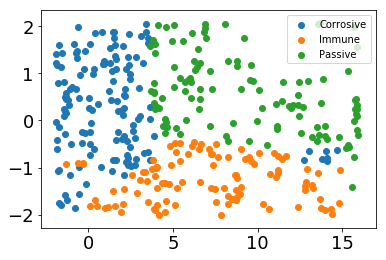

In [25]:
plt.scatter(
    testing_data_points_df[testing_data_points_df['label'] == 'Corrosive']['x'], 
    testing_data_points_df[testing_data_points_df['label'] == 'Corrosive'].y,
    label='Corrosive'
)

plt.scatter(
    testing_data_points_df[testing_data_points_df['label'] == 'Immune']['x'],
    testing_data_points_df[testing_data_points_df['label'] == 'Immune'].y,
    label='Immune'
)

plt.scatter(
    testing_data_points_df[testing_data_points_df['label'] == 'Passive'].x, 
    testing_data_points_df[testing_data_points_df['label'] == 'Passive'].y,
    label='Passive'
)

plt.legend()

## De-bugging

In [27]:
testing_data_points_df[(testing_data_points_df.x<0) & (testing_data_points_df.y<-1.8)]

,x,y,label
223,-0.769637,-1.846432,Corrosive


In [29]:
test_data_point = [-0.769637, -1.846432]

In [30]:
print('Corrosive MF')
print(
    ExtractRulesQPSO._maxMembershipFromAllRules(
        centers_corrosive, stds_corrosive, test_data_point
    )
)

print('Immune MF')
print(
    ExtractRulesQPSO._maxMembershipFromAllRules(
        centers_immune, stds_immune, test_data_point
    )
)

print('Passive MF')

print(
    ExtractRulesQPSO._maxMembershipFromAllRules(
        centers_passive, stds_passive, test_data_point
    )
)

Corrosive MF
0.4703244273909599
Immune MF
0.38674287808734686
Passive MF
5.9256370996616805e-08


### Single rules

In [31]:
centers_corrosive, stds_corrosive

(array([[ 1.32324787,  0.18815782],
        [-0.16031478,  1.59472809],
        [13.90994267, -0.81649387]]), array([[ 1.58053258,  1.95247231],
        [ 2.26252651,  2.87148763],
        [ 1.86083474, -0.14765669]]))

In [33]:
(
    ExtractRulesQPSO._expMembership(test_data_point[0], 1.32324787, 1.58053258) * 
    ExtractRulesQPSO._expMembership(test_data_point[1], 0.18815782, 1.95247231)
),(
    ExtractRulesQPSO._expMembership(test_data_point[0], -0.16031478, 2.26252651) * 
    ExtractRulesQPSO._expMembership(test_data_point[1], 1.59472809, 2.87148763)
), (
    ExtractRulesQPSO._expMembership(test_data_point[0], 13.90994267, 1.86083474) * 
    ExtractRulesQPSO._expMembership(test_data_point[1], -0.81649387, -0.14765669)
)

(0.24179905289496004, 0.470324425651895, 8.347163695052841e-25)

In [ ]:
(
    ExtractRulesQPSO._expMembership(test_data_point[0], 1.32324787, 1.58053258) * 
    ExtractRulesQPSO._expMembership(test_data_point[1], 0.18815782, 1.95247231)
),(
    ExtractRulesQPSO._expMembership(test_data_point[0], -0.16031478, 2.26252651) * 
    ExtractRulesQPSO._expMembership(test_data_point[1], 1.59472809, 2.87148763)
), (
    ExtractRulesQPSO._expMembership(test_data_point[0], 13.90994267, 1.86083474) * 
    ExtractRulesQPSO._expMembership(test_data_point[1], -0.81649387, -0.14765669)
)

## Trying out another clustering algorithm

In [54]:
# Regenerate fuzzy model with 3 cluster centers - note that center ordering
# is random in this clustering algorithm, so the centers may change places
data_corrosive_t = data_corrosive.transpose()
data_immune_t = data_immune.transpose()
data_passive_t = data_passive.transpose()

num_clusters = 7

cntr_corrosive, u_orig_corrosive, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_corrosive_t, num_clusters, 2, error=0.005, maxiter=1000
)

cntr_immune, u_orig_immune, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_immune_t, num_clusters, 2, error=0.005, maxiter=1000
)

cntr_passive, u_orig_passive, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_passive_t, num_clusters, 2, error=0.005, maxiter=1000
)

cntr = np.concatenate([cntr_corrosive, cntr_immune, cntr_passive])

cntr

array([[ 2.2098082 ,  0.152821  ],
       [14.36062063, -0.80524832],
       [ 6.47453683, -0.46370545],
       [ 0.07162957,  0.26925485],
       [ 4.07589727, -0.10605563],
       [ 0.88998003,  1.39616119],
       [-1.33218322,  0.47320712],
       [ 1.52410739, -1.30649424],
       [13.7599367 , -1.48453067],
       [ 8.42744754, -1.26048739],
       [ 3.98634515, -1.2387422 ],
       [10.97731945, -1.23769171],
       [-0.82674252, -1.1553213 ],
       [ 6.03722944, -1.14776737],
       [ 7.05509792,  0.99755792],
       [10.5644212 ,  0.28139703],
       [15.56591289,  0.51334408],
       [13.1852553 ,  0.05761425],
       [ 5.2535066 ,  0.94587622],
       [ 8.97475006,  0.80092325],
       [ 3.04803421,  1.3990744 ]])

In [55]:
xs = []
ys = []

for data_point in test_data_corrosive:
    xs.append(data_point[0])
    ys.append(data_point[1])

    
for data_point in test_data_immune:
    xs.append(data_point[0])
    ys.append(data_point[1])
    
for data_point in test_data_passive:
    xs.append(data_point[0])
    ys.append(data_point[1])
    
newdata = np.array([xs, ys])
newdata.shape

(2, 360)

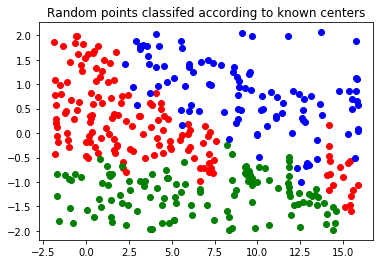

In [56]:
# Predict new cluster membership with `cmeans_predict` as well as
# `cntr` from the 3-cluster model
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata, cntr, 2, error=0.005, maxiter=1000)

# Plot the classified uniform data. Note for visualization the maximum
# membership value has been taken at each point (i.e. these are hardened,
# not fuzzy results visualized) but the full fuzzy result is the output
# from cmeans_predict.
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization

fig3, ax3 = plt.subplots()
colors = ['r', 'g', 'b']
ax3.set_title('Random points classifed according to known centers')
for j in range(num_clusters * 3):
    ax3.plot(newdata.T[cluster_membership == j, 0],
             newdata.T[cluster_membership == j, 1], 'o',
             label='series ' + str(j), color = colors[int(j / num_clusters)])
# ax3.legend()

plt.show()